# COGS 108 - Data Checkpoint

# Names

- David Soberanis 
- Yewon Hong 
- Andrew Burda
- Zach Lloyd
- Lawrence Kuo


<a id='research_question'></a>
# Research Question

How does a Graduate/Bachelors's school diploma affect housing cost and happiness? Happiness will be measured from a happiness index and housing value will be taken from Zillow’s API.
 
Misc ideas and things to consider
(Location Scope world or US prob US) for now US
(Time scope?) Possibly 2005 onward depending on US census data
We can display results with US map for the final project 


# Dataset(s)

Set 1: happiness data
- Dataset Name: happiness_raw_data.csv
- Link to the dataset: https://github.com/COGS108/Group076-Wi22/blob/6e034ac40c772d62c4900041e9eef13abf3c043c/happiness_raw_data.csv
- Number of observations:  183
- Contains a happiness score based on Emotional & Physical Well-Being, Income & Employment, and Community & Environment. It ranks every major city in the United States by a total happiness score, below we take the total score and use that as our happiness score for each city.
 
Set 2: House price and region data
- Dataset Name: zillow_raw_data.csv
- Link to the dataset: https://github.com/COGS108/Group076-Wi22/blob/6e034ac40c772d62c4900041e9eef13abf3c043c/zillow_raw_data.csv
- Link for JSON: https://github.com/COGS108/Group076-Wi22/blob/6e034ac40c772d62c4900041e9eef13abf3c043c/final_data.json
- Number of observations: 394,743
- Contains every region in the United States and information including price and city size data. Price and city size data were converted into a JSON below. Both happiness data and house region data were combined below.
 
Set 3: Education attainment rate
- Dataset Name: Education attainment rate: places within the United States of America(2019)
- Link to the dataset: https://datacommons.org/tools/timeline#&place=country/USA,geoId/06,geoId/48,geoId/12,geoId/36,geoId/42&statsVar=Count_Person_EducationalAttainmentNoSchoolingCompleted__Count_Person_EducationalAttainmentRegularHighSchoolDiploma__Count_Person_EducationalAttainmentBachelorsDegree__Count_Person_EducationalAttainmentMastersDegree__Count_Person_EducationalAttainmentDoctorateDegree&pc&denom=Count_Person_25OrMoreYears
- Link to raw dataset: https://github.com/COGS108/Group076-Wi22/blob/6e034ac40c772d62c4900041e9eef13abf3c043c/education_states.csv
- Number of observations: 240
- Contains the highest grade achieved rate for 5 major states in the US. This will be later expanded to include attainment for all US cities. 

Set 4: House price and region data
- Dataset Name: Distribution of occupied housing units by price: places within the United States of America(2013)
- Link to the dataset: https://datacommons.org/tools/timeline#&place=country/USA,geoId/06,geoId/48,geoId/12,geoId/36,geoId/42&statsVar=Count_HousingUnit_HomeValueUpto49999USDollar__Count_HousingUnit_HomeValue50000To99999USDollar__Count_HousingUnit_HomeValue100000To199999USDollar__Count_HousingUnit_HomeValue200000To299999USDollar__Count_HousingUnit_HomeValue300000To499999USDollar__Count_HousingUnit_HomeValue500000To999999USDollar__Count_HousingUnit_HomeValue1000000To1499999USDollar__Count_HousingUnit_HomeValue1500000To1999999USDollar__Count_HousingUnit_HomeValue2000000OrMoreUSDollar&pc&denom=Count_HousingUnit  
- Link to raw dataset: https://github.com/COGS108/Group076-Wi22/blob/6e034ac40c772d62c4900041e9eef13abf3c043c/occupied_housing_units_by_price.csv
- Number of observations: 90
- Contains the percentage of houses which are occupied broken down by housing price. This breakdown is done per state, we will later get this data for each city. 

Set 5: Bachelor count by city for 2017 (can modify to include data from 2009-2017)
- Link to the dataset: https://data.diversitydatakids.org/dataset/15002_1_c-adults-aged-25--with-a-college-degree--count--by-race-ethnicity/resource/77e85af3-f289-42ba-b264-34fe9a381ce8
- Link to raw dataset: https://github.com/COGS108/Group076-Wi22/blob/18143201429f84edaf35be20f1552207cba32ddf/bach_by_city_raw.csv
- Number of observations: 5,152
- Contains the number of people with bachelor degress in each city for the United States. 


# Setup

In [1]:
# Imports
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Data Setup
raw_housing_data_df = pd.read_csv('zillow_raw_data.csv')

raw_happiness_data_df = pd.read_csv('happiness_raw_data.csv')

# bachelor data
# Note source includes data from 2009-2017 might impact our time scope
bach = pd.read_csv("bach_by_city_raw.csv")
bach = bach[bach['year']==2017]     # only includes data from 2017 there are more years in the csv we can draw from
bach = bach.iloc[:,[1,3]]
bach.columns = ['City', 'Total Bachelors']
bach = bach.reset_index(drop=True)
# bach

In [5]:
raw_housing_data_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31
0,102001,0,United States,Country,NaN,127090.0,127434.0,127795.0,128532.0,129274.0,...,278389.0,282245.0,286948.0,292471.0,298349.0,303739.0,308359.0,312452.0,316333.0,320662.0
1,394913,1,"New York, NY",Msa,NY,223496.0,224831.0,226033.0,228398.0,230600.0,...,523812.0,528535.0,534026.0,541165.0,549066.0,556634.0,562515.0,567048.0,570588.0,573813.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,231337.0,232142.0,233376.0,235722.0,238237.0,...,757038.0,768091.0,783767.0,803587.0,824502.0,837956.0,847074.0,851836.0,859045.0,868350.0
3,394463,3,"Chicago, IL",Msa,IL,168878.0,169276.0,169792.0,170824.0,171917.0,...,260755.0,263775.0,266508.0,270301.0,274437.0,278525.0,281576.0,284217.0,286894.0,289595.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,130599.0,130703.0,130790.0,131002.0,131225.0,...,285247.0,290780.0,297205.0,304541.0,312359.0,320271.0,327472.0,333559.0,339033.0,344919.0


In [6]:
raw_happiness_data_df.head()

,Overall Rank,City,Total Score,Emotional & Physical Well-Being,Income & Employment,Community & Environment
0,1,"Fremont, CA",73.66,1,46,5
1,2,"Bismarck, ND",71.59,5,5,23
2,3,"Fargo, ND",70.94,9,3,17
3,4,"Madison, WI",70.14,13,6,14
4,5,"San Jose, CA",69.47,2,21,75


In [7]:
bach.head()

,City,Total Bachelors
0,"Birmingham city, Alabama",39370
1,"Dothan city, Alabama",11990
2,"Hoover city, Alabama",34745
3,"Huntsville city, Alabama",56011
4,"Mobile city, Alabama",38710


# Data Cleaning

1. Set RegionName in housing data to just be city (get rid of dashes)
2. Turn happiness data into dictionary
3. Add matching cities from Zillow data with appropriate dates

In [10]:
# Generic Functions
def get_only_city_name(regionName):
    # Function to split strings at every '-' and return the last element of the new List
    # In order to split RegionName from Zillow data to just city name
    return regionName.split('-')[-1]

In [11]:
# Add Columns
raw_housing_data_df["CityName"] = raw_housing_data_df["RegionName"].apply(get_only_city_name)

In [12]:
# Re-index DataFrames
raw_housing_data_df.set_index("CityName", drop=True, inplace=True) # Indexing variable becomes city name
raw_happiness_data_df.set_index("City", drop=True, inplace=True) # Indexing variable becomes city name

In [13]:
# Create Data Dictionaries

total_data = raw_happiness_data_df.to_dict(orient="index") # Return dict of DF

housing_dict = raw_housing_data_df.dropna().to_dict(orient="index") # Return dict of all valid rows

for city in total_data:
    # Add all instances of housing data with matching cities to data dict
    if city in housing_dict:
        total_data[city]["house_data"] = housing_dict[city]

total_data_filtered = {}

for city in total_data:
    # Remove all data without housing data
    if 'house_data' in total_data[city]:
        total_data_filtered[city] = total_data[city]

print('test')

## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

test


In [14]:
# Create Final JSON File and print count of cities in dataset

print(len(total_data_filtered)) # 87 as of time of writing

with open("final_data.json", "w") as f:
    json.dump(total_data_filtered, f)

87


In [15]:
# bachelor data
# cleans redundent word 'city' from city column
def remove_city(str_in):
    return str_in.replace('city', '')
    
bach_2 = bach
bach_2[['City','State']] = bach_2.City.str.split(", ",expand=True)
bach_2['City'] = bach_2['City'].apply(remove_city)
bach_2 = df = bach_2[['City', 'State', 'Total Bachelors']]
# bach_2

In [23]:
data_sets = [raw_housing_data_df, raw_happiness_data_df, bach, bach_2]

for data_set in data_sets:
    print(data_set.shape)


(908, 269)
(182, 5)
(608, 3)
(608, 3)


In [24]:
data = pd.concat([raw_housing_data_df, raw_happiness_data_df, bach, bach_2])
data

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-11-30,2021-12-31,Overall Rank,Total Score,Emotional & Physical Well-Being,Income & Employment,Community & Environment,City,Total Bachelors,State
United States,102001.0,0.0,United States,Country,NaN,127090.0,127434.0,127795.0,128532.0,129274.0,...,316333.0,320662.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"New York, NY",394913.0,1.0,"New York, NY",Msa,NY,223496.0,224831.0,226033.0,228398.0,230600.0,...,570588.0,573813.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Anaheim, CA",753899.0,2.0,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,231337.0,232142.0,233376.0,235722.0,238237.0,...,859045.0,868350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Chicago, IL",394463.0,3.0,"Chicago, IL",Msa,IL,168878.0,169276.0,169792.0,170824.0,171917.0,...,286894.0,289595.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Fort Worth, TX",394514.0,4.0,"Dallas-Fort Worth, TX",Msa,TX,130599.0,130703.0,130790.0,131002.0,131225.0,...,339033.0,344919.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Madison,90470.0,Wisconsin
604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Milwaukee,87519.0,Wisconsin
605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oshkosh,12692.0,Wisconsin
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Racine,8129.0,Wisconsin


In [26]:
independent_variables = ['City','State','Total Bachelors','Total Score',]

# Data Analysis & Results (EDA)


Carry out EDA on your dataset(s); Describe in this section



1. How many observations (rows) and variables (columns) you have is an important first step. You should always be aware of the size of your dataset 							
2. It’s critical to know how many observations have missing data for variables of interest in your data. Knowing why their missing is also important.										
3. It’s critical to know the distribution of the variables in your dataset. Certain statistical approaches can only be used with certain distributions.				
4. Knowing the mean, median, and/or mode can help you get an idea of what a typical value is for your variable(s) of interest						
5. The central tendency tells you part of the story. The variability in the values in your observation helps fill in the rest. 


In [27]:
data.describe()

,RegionID,SizeRank,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,...,2021-09-30,2021-10-31,2021-11-30,2021-12-31,Overall Rank,Total Score,Emotional & Physical Well-Being,Income & Employment,Community & Environment,Total Bachelors
count,908.000000,908.000000,443.000000,444.000000,445.000000,447.000000,449.000000,450.000000,451.000000,452.000000,...,9.050000e+02,9.060000e+02,9.080000e+02,7.150000e+02,182.000000,182.000000,182.000000,182.000000,182.000000,1.216000e+03
mean,415016.392070,458.099119,110885.656885,111201.216216,111437.339326,112258.961969,113086.850780,113614.515556,114312.345898,114990.584071,...,2.339096e+05,2.367479e+05,2.393582e+05,2.623431e+05,91.500000,54.851648,91.500000,91.489011,91.500000,4.574825e+04
std,84133.878975,267.957457,52945.860694,53124.146702,53379.402758,54251.985319,55018.648199,55794.025688,56545.227636,57385.303393,...,1.579829e+05,1.604598e+05,1.627129e+05,1.737353e+05,52.683014,7.712760,52.683014,52.667700,52.683014,1.148214e+05
min,102001.000000,0.000000,29833.000000,30000.000000,30096.000000,30228.000000,30422.000000,30522.000000,30698.000000,30687.000000,...,3.194200e+04,3.202200e+04,3.197400e+04,6.042400e+04,1.000000,34.290000,1.000000,1.000000,1.000000,1.545000e+03
25%,394547.750000,226.750000,76483.500000,76825.750000,77124.000000,77484.500000,77622.000000,77867.750000,78193.500000,78492.250000,...,1.394820e+05,1.407870e+05,1.423502e+05,1.574545e+05,46.250000,49.117500,46.250000,46.250000,46.250000,1.503250e+04
50%,394803.500000,454.500000,99865.000000,100173.000000,100257.000000,100615.000000,101340.000000,101657.500000,101957.000000,102500.500000,...,1.855660e+05,1.863590e+05,1.879300e+05,2.098230e+05,91.500000,54.645000,91.500000,91.500000,91.500000,2.469050e+04
75%,395049.250000,686.250000,128962.500000,128968.750000,129114.000000,129879.000000,130501.000000,131095.750000,131774.000000,132078.250000,...,2.805110e+05,2.827188e+05,2.848670e+05,3.122020e+05,136.750000,60.072500,136.750000,136.750000,136.750000,3.971625e+04
max,753929.000000,933.000000,433325.000000,435925.000000,439643.000000,450255.000000,460420.000000,472478.000000,481789.000000,494138.000000,...,1.491947e+06,1.500812e+06,1.515425e+06,1.536201e+06,182.000000,73.660000,182.000000,182.000000,182.000000,2.267945e+06


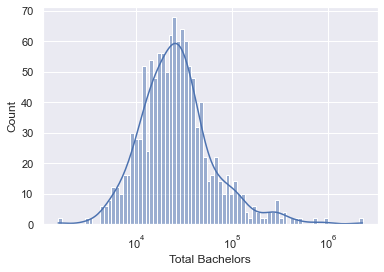

In [28]:
sns.histplot(data['Total Bachelors'],bins=80, log_scale=True, kde=True);

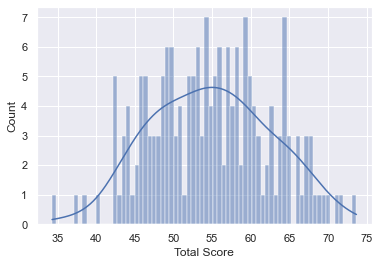

In [29]:
sns.histplot(data['Total Score'],bins=70, kde=True);

In [35]:
# State and City are categorical

In [34]:
# the range for all the independent variables

for variable in independent_variables:
    the_range = data[variable].max() - data[variable].min()
    print('Range for',variable,the_range)

TypeError: '>=' not supported between instances of 'float' and 'str'